In [1]:
pwd

'C:\\Users\\Admin\\Desktop\\ImageProcess'

In [6]:
import tensorflow as tf


In [7]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [8]:
pip list

Package                            Version            
---------------------------------- -------------------
absl-py                            0.9.0              
alabaster                          0.7.12             
anaconda-client                    1.7.2              
anaconda-navigator                 1.9.7              
anaconda-project                   0.8.3              
asn1crypto                         1.2.0              
astor                              0.8.1              
astroid                            2.3.3              
astropy                            4.0                
atomicwrites                       1.3.0              
attrs                              19.3.0             
Babel                              2.8.0              
backcall                           0.1.0              
backports.functools-lru-cache      1.6.1              
backports.os                       0.1.1              
backports.shutil-get-terminal-size 1.0.0              
backports.

In [1]:
%matplotlib inline
from IPython.display import display,Math,Latex

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

img=Image.open('dataset/low8.jpeg')

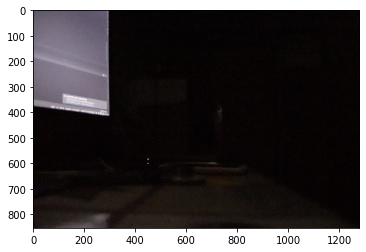

In [2]:
plt.imshow(img,cmap='gray')

In [3]:
#converting my image into numpy array

img=np.asarray(img)

(array([1.176940e+06, 1.025222e+06, 2.455890e+05, 1.577250e+05,
        1.171350e+05, 8.522100e+04, 5.592300e+04, 2.246700e+04,
        1.123500e+04, 3.889000e+03, 3.006000e+03, 2.891000e+03,
        3.204000e+03, 3.394000e+03, 2.983000e+03, 2.595000e+03,
        2.499000e+03, 7.502000e+03, 1.026500e+04, 1.398300e+04,
        1.632600e+04, 2.600200e+04, 3.498100e+04, 3.846200e+04,
        4.083900e+04, 4.139100e+04, 3.437400e+04, 2.372000e+04,
        1.627800e+04, 9.243000e+03, 7.093000e+03, 5.152000e+03,
        3.493000e+03, 2.720000e+03, 2.409000e+03, 1.892000e+03,
        3.004000e+03, 2.339000e+03, 1.377000e+03, 1.525000e+03,
        1.918000e+03, 1.959000e+03, 1.418000e+03, 1.295000e+03,
        9.570000e+02, 7.750000e+02, 5.460000e+02, 2.940000e+02,
        6.000000e+01, 1.000000e+01]),
 array([  0.  ,   4.98,   9.96,  14.94,  19.92,  24.9 ,  29.88,  34.86,
         39.84,  44.82,  49.8 ,  54.78,  59.76,  64.74,  69.72,  74.7 ,
         79.68,  84.66,  89.64,  94.62,  99.6 , 10

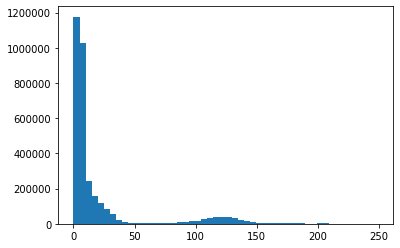

In [4]:
#flattening image pixels
flat=img.flatten()

#showing histogram
plt.hist(flat,bins =50)

In [5]:
#histogram equalisation function

display(Math(r'P_x(j) = \sum_{i=0}^{j} P_x(i)'))

<IPython.core.display.Math object>

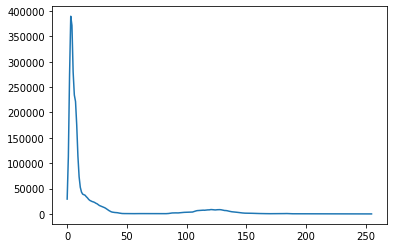

In [6]:
def get_histogram(image,bins):
    histogram = np.zeros(bins)
    for pixel in image:
        histogram[pixel]+=1
    return histogram
hist = get_histogram(flat,256)
plt.plot(hist)

<IPython.core.display.Math object>

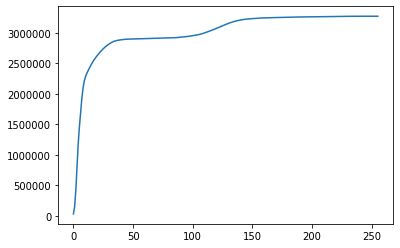

In [7]:
def cumsum(a):
    a=iter(a)
    b=[next(a)]
    for i in a:
        b.append(b[-1]+i)
    return np.array(b)

cs = cumsum(hist)
plt.plot(cs)

display(Math(r's_k = \sum_{j=0}^{k} {\frac{n_j}{N}}'))

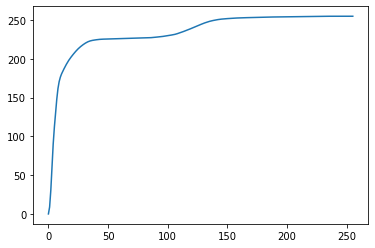

In [8]:
#normalizing between 0-255

nj=(cs-cs.min())*255
N=cs.max()-cs.min()

cs = nj/N
plt.plot(cs)

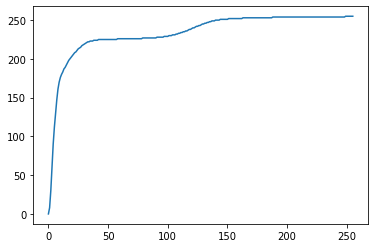

In [9]:
cs=cs.astype('uint8')
plt.plot(cs)

(array([ 29231., 113192.,      0.,      0.,      0., 273264.,      0.,
             0.,      0.,      0.,      0., 389700.,      0.,      0.,
             0.,      0.,      0., 371553.,      0.,      0.,      0.,
        279687.,      0.,      0.,      0., 234392.,      0.,      0.,
        221659.,      0.,      0., 175369.,      0., 114115.,  73334.,
         95517.,  38959.,  74586.,  65646.,  55272.,  96059.,  59371.,
         60639.,  70113.,  65187.,  59666.,  61366.,  65629.,  66257.,
         65757.]),
 array([  0. ,   5.1,  10.2,  15.3,  20.4,  25.5,  30.6,  35.7,  40.8,
         45.9,  51. ,  56.1,  61.2,  66.3,  71.4,  76.5,  81.6,  86.7,
         91.8,  96.9, 102. , 107.1, 112.2, 117.3, 122.4, 127.5, 132.6,
        137.7, 142.8, 147.9, 153. , 158.1, 163.2, 168.3, 173.4, 178.5,
        183.6, 188.7, 193.8, 198.9, 204. , 209.1, 214.2, 219.3, 224.4,
        229.5, 234.6, 239.7, 244.8, 249.9, 255. ]),
 <a list of 50 Patch objects>)

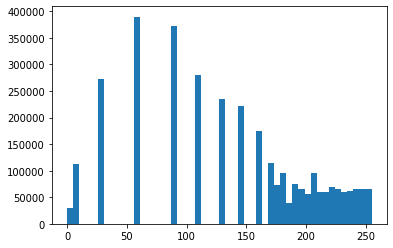

In [10]:
img_new = cs[flat]
plt.hist(img_new,bins=50)

In [11]:
img_new = np.reshape(img_new,img.shape)
img_new

array([[[227, 226, 229],
        [227, 227, 230],
        [228, 227, 231],
        ...,
        [ 90, 130,  60],
        [ 60, 112,  30],
        [  8,  60,   0]],

       [[227, 227, 229],
        [227, 227, 230],
        [227, 227, 230],
        ...,
        [130, 161, 112],
        [112, 147,  90],
        [ 90, 130,  60]],

       [[227, 227, 230],
        [227, 227, 230],
        [228, 227, 231],
        ...,
        [112, 147,  90],
        [112, 147,  90],
        [ 90, 130,  60]],

       ...,

       [[192, 192, 187],
        [192, 192, 187],
        [187, 187, 180],
        ...,
        [176, 147,  30],
        [170, 130,   8],
        [161, 112,   0]],

       [[189, 195, 187],
        [195, 195, 189],
        [189, 189, 183],
        ...,
        [170, 161,  60],
        [161, 147,  30],
        [147, 130,   8]],

       [[192, 198, 189],
        [198, 202, 195],
        [198, 198, 192],
        ...,
        [176, 170,  90],
        [161, 147,  30],
        [161, 147,  30]]

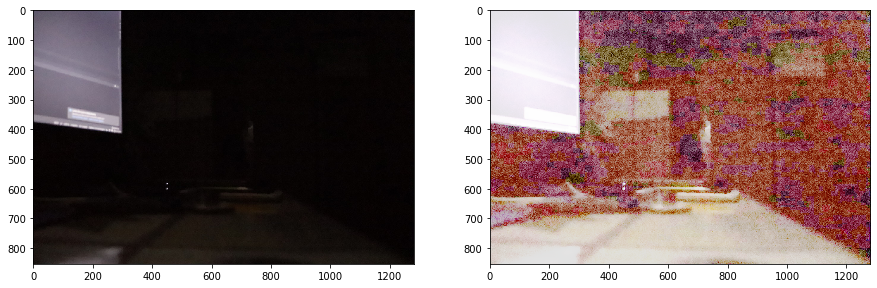

In [12]:
fig=plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

fig.add_subplot(1,2,1)
plt.imshow(img,cmap='gray')

#new image display

fig.add_subplot(1,2,2)
plt.imshow(img_new,cmap='gray')

plt.show(block=True)

In [13]:
newimg= Image.fromarray(img_new,'RGB')
newimg.save('dataset/low8enhanced.jpeg')
newimg.show()